In [3]:
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [4]:
def generate_synthetic_data(w, b, num_examples): 
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = generate_synthetic_data(true_w, true_b, 1000)

print('features:', features[0], '\nlabel:', labels[0])

features: tf.Tensor([-0.21270509  0.5723372 ], shape=(2,), dtype=float32) 
label: tf.Tensor([1.84144], shape=(1,), dtype=float32)


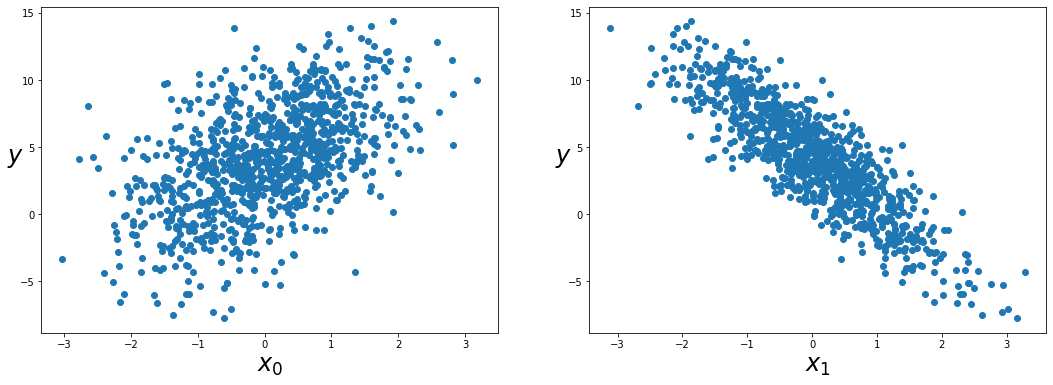

In [26]:
fig, ax = plt.subplots(figsize=(18, 6), ncols=2, nrows=1)

ax[0].scatter(features[:, 0].numpy(), labels.numpy())
ax[0].set_xlabel(r"$x_0$", fontsize=24)
ax[0].set_ylabel(r"$y$", fontsize=24)
ax[0].set_ylabel(r"$y$", fontsize=24, rotation=0)

ax[1].scatter(features[:, 1].numpy(), labels.numpy())
ax[1].set_xlabel(r"$x_1$", fontsize=24)
ax[1].set_ylabel(r"$y$", fontsize=24, rotation=0)

plt.show()

In [48]:
# Low level implimentation

w = tf.Variable(
    tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
    trainable=True
)
b = tf.Variable(
    tf.zeros(1),
    trainable=True
)

def linreg(X, w, b): 
    """The linear regression model."""
    return tf.matmul(X, w) + b

def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape))**2

def stochastic_gd(params, grads, lr, batch_size): 
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr * grad / batch_size)

In [49]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)
        
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[ 1.4341501  -0.534621  ]
 [ 0.35885096  0.559166  ]
 [-0.1716532  -0.23980334]
 [-1.9505863   0.5392859 ]
 [ 1.2918154   0.82283026]
 [-0.5450475  -1.3400012 ]
 [ 0.60073084  0.712347  ]
 [ 1.6453316  -0.10257518]
 [-1.5658071   1.5358942 ]
 [-0.49260813  1.7983207 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 8.891451 ]
 [ 3.0184968]
 [ 4.6925   ]
 [-1.5280519]
 [ 3.9920824]
 [ 7.6611743]
 [ 2.961068 ]
 [ 7.865807 ]
 [-4.1502414]
 [-2.8980296]], shape=(10, 1), dtype=float32)


In [50]:
lr = 0.05
num_epochs = 10
loss = squared_loss

train_l = loss(linreg(features, w, b), labels)
print(f'Before Training: loss {float(tf.reduce_mean(train_l)):f}')

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(linreg(X, w, b), y)  
        dw, db = g.gradient(l, [w, b])
        
        stochastic_gd([w, b], [dw, db], lr, batch_size)
        
    train_l = loss(linreg(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

Before Training: loss 32.412693
epoch 1, loss 0.000106
epoch 2, loss 0.000107
epoch 3, loss 0.000106
epoch 4, loss 0.000105
epoch 5, loss 0.000105
epoch 6, loss 0.000106
epoch 7, loss 0.000107
epoch 8, loss 0.000106
epoch 9, loss 0.000105
epoch 10, loss 0.000107


In [66]:
w.numpy()[:], true_w.numpy()[:]

(array([[ 2.0018165],
        [-3.4003215]], dtype=float32),
 array([ 2. , -3.4], dtype=float32))

In [63]:
b.numpy()[0], true_b

(array([4.2001376], dtype=float32), 4.2)

In [69]:
# Using Keras is much faster!
initializer = tf.initializers.RandomNormal(stddev=0.01)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

loss = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.SGD(learning_rate=0.03)

net.compile(
    optimizer=opt,
    loss=loss
)
net.fit(
    features, labels,
    batch_size=32,
    epochs=10
)

Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 17.0114
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.3673
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 2.5415e-04
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 1.0120e-04
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 1.0996e-04
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 9.9313e-05
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 1.0555e-04
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 1.0626e-04
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 1.0338e-04


In [82]:
y_train_dense = tf.one_hot(y_train_dense, 10)

In [86]:
# Now lets try to do image classification!
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# y_train = tf.one_hot(y_train_dense, 10)
# y_test = tf.one_hot(y_test_dense, 10)

net = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

net.compile(
    optimizer=opt,
    loss=loss,
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)
net.fit(
    x_train, y_train,
    batch_size=32,
    epochs=10, 
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4227833.4647 - categorical_accuracy: 7.4700e-04 - val_loss: 2.3016 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 27.1243 - categorical_accuracy: 0.0000e+00 - val_loss: 2.3013 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3022 - categorical_accuracy: 0.0079 - val_loss: 2.3020 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3018 - categorical_accuracy: 0.0000e+00 - val_loss: 2.3020 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3022 - categorical_accuracy: 0.0000e+00 - val_loss: 2.3019 - val_categorical_accuracy: 0.0000e+00
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3019 - categorical_accuracy: 0.0012 - v